In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nRowsRead = 1000
df = pd.read_csv('train.csv', delimiter=',')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.describe().head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000


# how ram is effected by the price

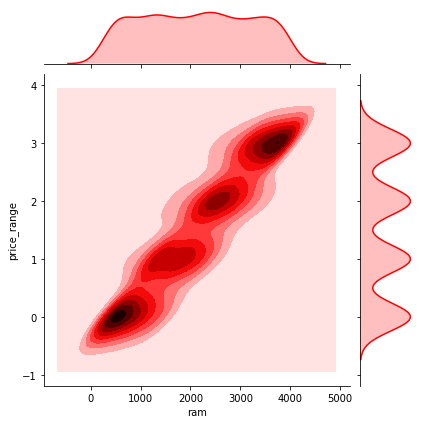

In [5]:
sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde');

# Internal memory vs price

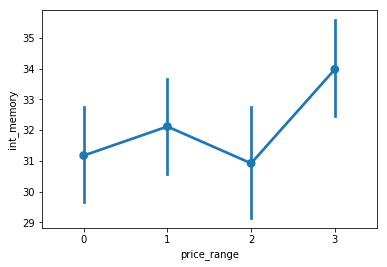

In [6]:
sns.pointplot(y='int_memory',x='price_range',data=df)

# % of phones which support 3g

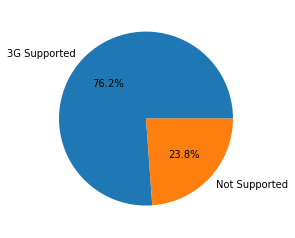

In [7]:
label = ["3G Supported","Not Supported"]
values = df['three_g'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values,labels=label,autopct='%1.1f%%')
plt.show()

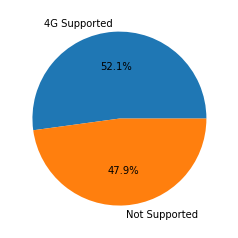

In [8]:
label = ["4G Supported","Not Supported"]
values = df['four_g'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values,labels=label,autopct='%1.1f%%')
plt.show()

# battery power

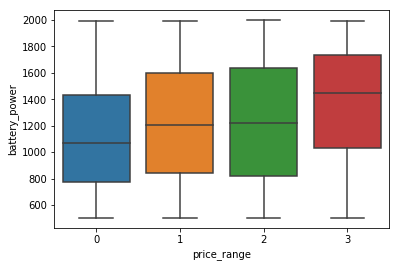

In [9]:
sns.boxplot(x='price_range',y='battery_power',data=df)

In [10]:
X = df.drop('price_range',axis=1)

In [16]:
y = df['price_range']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=3)
lm = LinearRegression()
lm.fit(train_x,train_y)
print("Accuracy",lm.score(test_x,test_y))


Accuracy 0.9178577677226879


ks=1 neighbors Accuracy 0.90
ks=2 neighbors Accuracy 0.90
ks=3 neighbors Accuracy 0.92
ks=4 neighbors Accuracy 0.91
ks=5 neighbors Accuracy 0.93
ks=6 neighbors Accuracy 0.91
ks=7 neighbors Accuracy 0.92
ks=8 neighbors Accuracy 0.92
ks=9 neighbors Accuracy 0.93


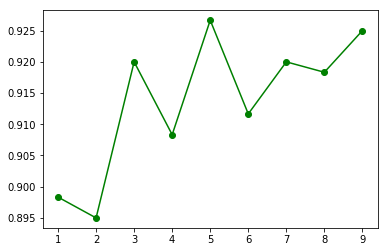

Best Accuracy  5


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

ks=10
mean_acc=np.zeros((ks-1))
for i in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors=i).fit(train_x,train_y)
    y_hat = knn.predict(test_x)
    mean_acc[i-1]=metrics.accuracy_score(test_y,y_hat)
    print("ks=%d neighbors"%i,"Accuracy %.2f"%mean_acc[i-1])


plt.plot(range(1,ks),mean_acc,marker='o',color='g')
plt.show()

print("Best Accuracy ",mean_acc.argmax()+1)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(test_x)
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       139
           1       0.92      0.94      0.93       157
           2       0.88      0.86      0.87       149
           3       0.93      0.93      0.93       155

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.92      0.93      0.92       600



In [72]:
matrix=confusion_matrix(test_y,pred)
print(matrix)

[[136   3   0   0]
 [  4 147   6   0]
 [  0  10 128  11]
 [  0   0  11 144]]


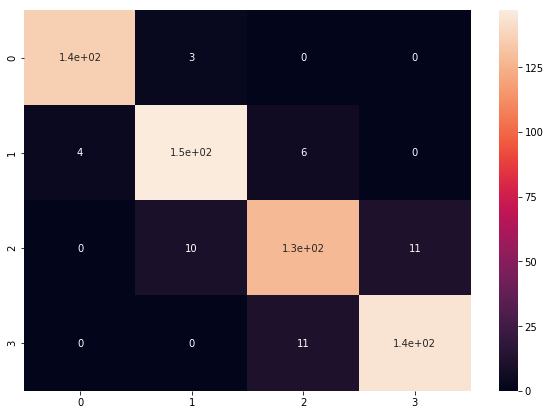

In [73]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# testing

In [75]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [77]:
test_df = test_df.drop('id',axis=1)

In [85]:
predicted_price=knn.predict(test_df)


In [87]:
predicted_price[0:5]

array([3, 3, 2, 3, 1])

In [90]:
predicted_price_reg =np.round(lm.predict(test_df))
predicted_price_reg[0:5]

array([3., 3., 2., 3., 1.])